# Desain Filter dengan Jendela

Dimulai dari filter ideal yang memiliki panjang tak terhingga. Agar kausal dan mencapai keseimbangan yang diinginkan antara bandwidth dan redaman stopband, perlu mengalikannya dengan jendela panjang terbatas. Jendela ini dapat diperoleh dengan mengoptimalkan salah satu jendela. Filter yang lebih panjang menghasilkan bandwidth transisi yang lebih sempit. Respon frekuensi yang diperoleh setelah mengalikan respon impuls ideal dengan fungsi window merupakan konvolusi respon frekuensi ideal dan respon frekuensi window Bandwidth yang dihasilkan merupakan bandwidth ideal ditambah bandwidth windowed.

Stopband yang dihasilkan dimulai pada frekuensi stopband dari respons frekuensi ideal (frekuensi ambang batas) ditambah  frekuensi stopband awal  dari fungsi jendela (bandwidth transisi tambahan). Untuk mendapatkan  pita sandi atau pita penghenti tertentu, hal ini harus diperhitungkan dan frekuensi cutoff harus diubah sesuai dengan itu.



## Contoh

Ditemukan bahwa jendela Kaiser setidaknya memenuhi persyaratan atenuasi aplikasi downsampling kami. Lalu bagaimana cara untuk mendapatkan titik awal yang tepat dari stop band dengan metode desain filter kita?

Rentang penghentian harus dimulai pada 0,5 untuk faktor subsampling N = 2. Melihat jendela Kaiser dengan β=8, kita melihat bahwa kita mendapatkan -60 dB pada frekuensi yang dinormalisasi sekitar 0,36. Oleh karena itu, filter ideal kita harus memiliki titik akhir bandwidth pada 0,5-0,36 = 0,14, jadi ωs = ωc = 0,14π.

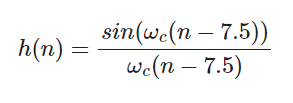

Pada n = 0,...,15,

Dengan normalisasi yang berbeda agar pita lulus dimulai pada 0 dB

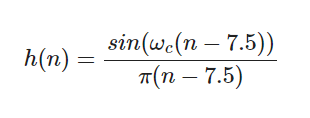

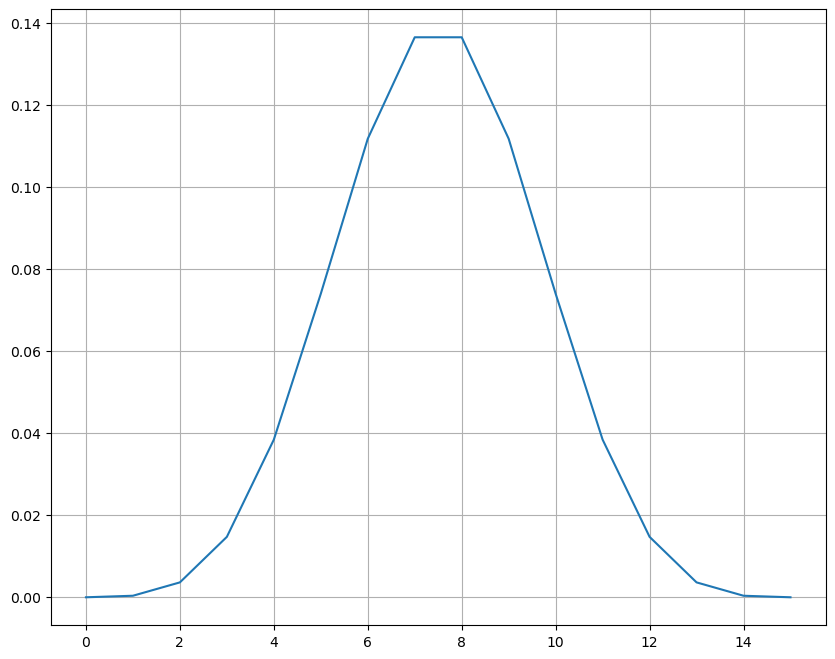

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n=np.arange(16);
h=np.sin(0.14*np.pi*(n-7.5))/(np.pi*(n-7.5));
hk=np.kaiser(16,8);
hfilt=hk*h

plt.figure(figsize=(10,8))
plt.plot(hfilt)
plt.grid()

Respons frekuensi:

In [ ]:
import scipy.signal as signal

def freqz(x):
    # get frequency bins and according magnitude values
    f, H = signal.freqz(x)

    #normalized frequency
    fNorm = f/np.pi

    # magnitude in dB
    hdB = 20 * np.log10(abs(H)+1e-5) #"+1e-5" avoids log10(0)!

    # open figure
    plt.figure(figsize=(10,8))

    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'b')
    plt.axis([0,np.pi,np.min(hdB)-1,np.max(hdB)+1])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')

    plt.subplot(212)
    plt.title('Phase')
    angles = np.unwrap(np.angle(H))
    anglesGrad = (360 * angles)/(2*np.pi)
    plt.plot(f, anglesGrad, 'b')
    plt.axis([0,np.pi,np.min(anglesGrad),np.max(anglesGrad)])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.tight_layout()

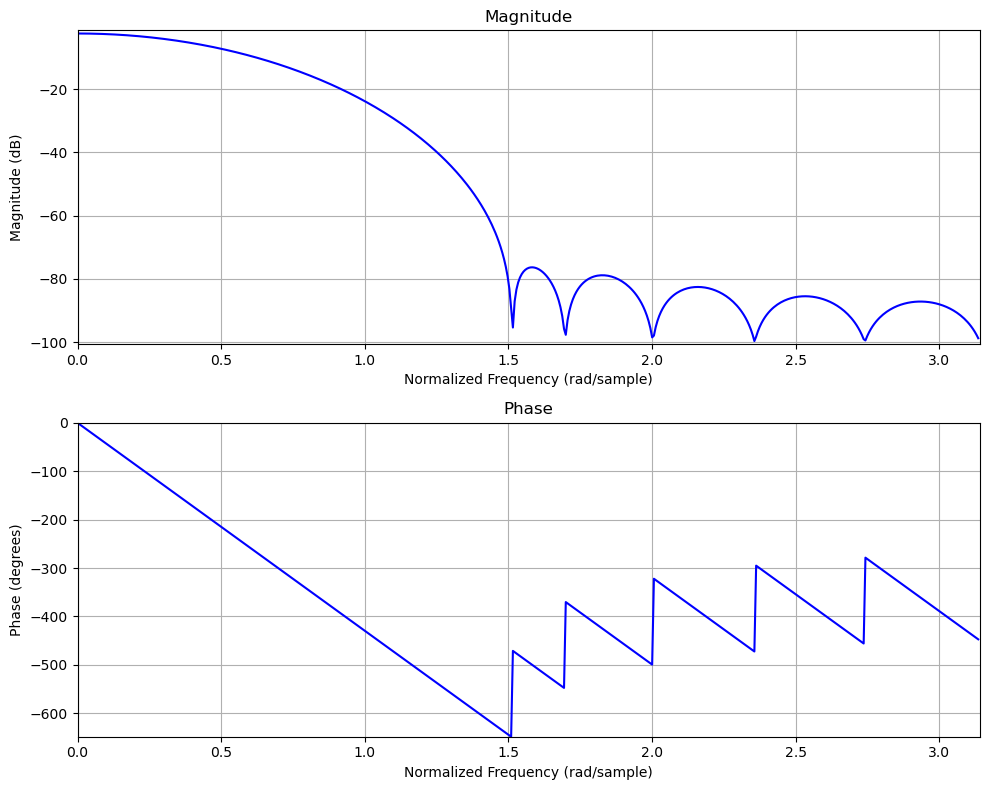

In [ ]:
freqz(hfilt)

Dapat dilihat bahwa pada frekuensi terstandarisasi 0,5 memiliki redaman cukup, sekitar -80 dB. Pita lulus hanya sampai frekuensi terstandarisasi, yaitu sekitar 0,15.

Jadi bagaimana cara untuk meningkatkan pita lulus? Karena sudah mencoba kompromi yang berbeda untuk lebar pita transisi dan redaman stopband, sekarang bisa dicoba untuk meningkatkan panjang filter. Berikut adalah jendela Kaiser untuk β=8 dengan panjang L=32:

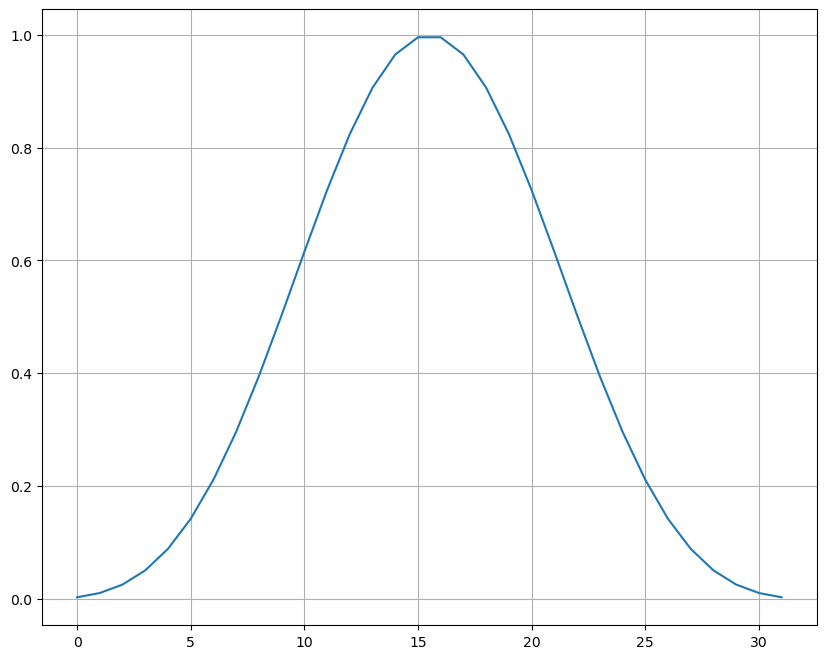

In [ ]:
hk=np.kaiser(32,8)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

Respons frekuensi:

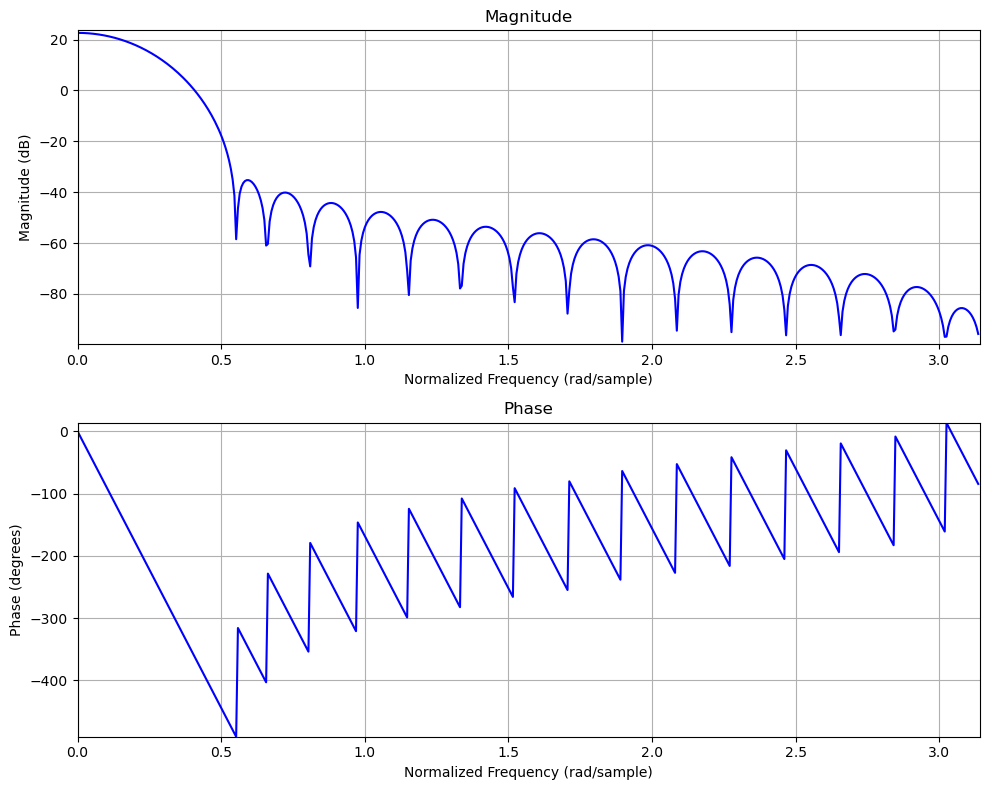

In [ ]:
freqz(hk)

Lobe utama dari jendela panjang 32 ini sekitar separuh lebarnya dibandingkan dengan lobe utama pada panjang 16. Dengan cara ini, lebar transisi dari filter yang dihasilkan telah berkurang. Di sini bisa dikatakan bahwa pita lulus berakhir pada frekuensi terstandarisasi 0,17. Oleh karena itu, perlu dimiliki filter ideal dengan stopband yang dimulai pada 0,5-0,17 = 0,33, menghasilkan rumus untuk respon impuls ideal, dengan ωc = 0,33⋅π, dan delay sebesar 31/2 = 15,5:

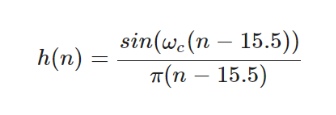

n = 0,...,31,

Kalikan dengan jendela kaiser.

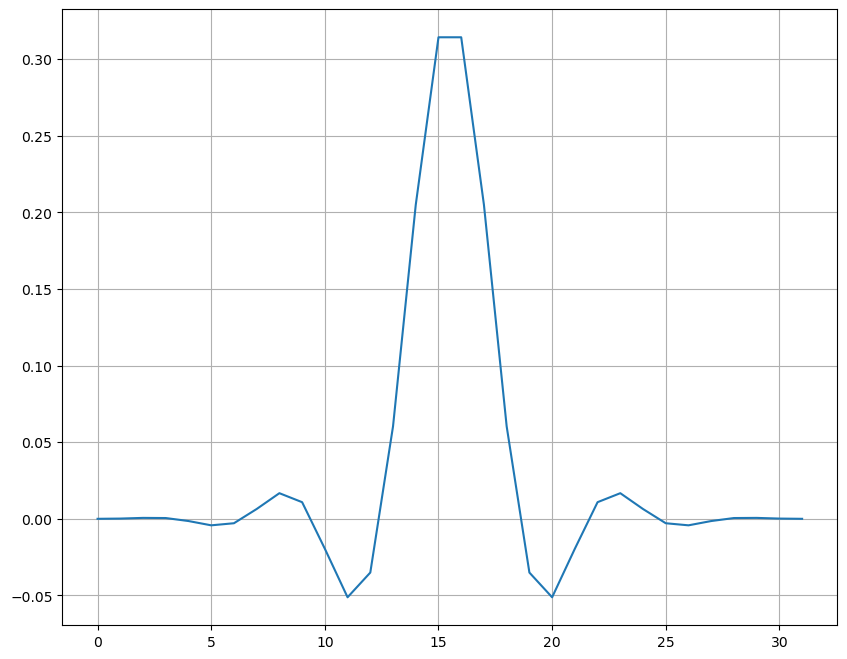

In [ ]:
n=np.arange(32);
#ideal impulse response:
h=np.sin(0.33*np.pi*(n-15.5))/(np.pi*(n-15.5));
#Kaiser window:
hk=np.kaiser(32,8);
#multiply ideal filter and Kaiser window:
hfilt=hk*h;
plt.figure(figsize=(10,8))
plt.plot(hfilt)
plt.grid()

Menghasilkan respon impuls:

Respons frekuensi:

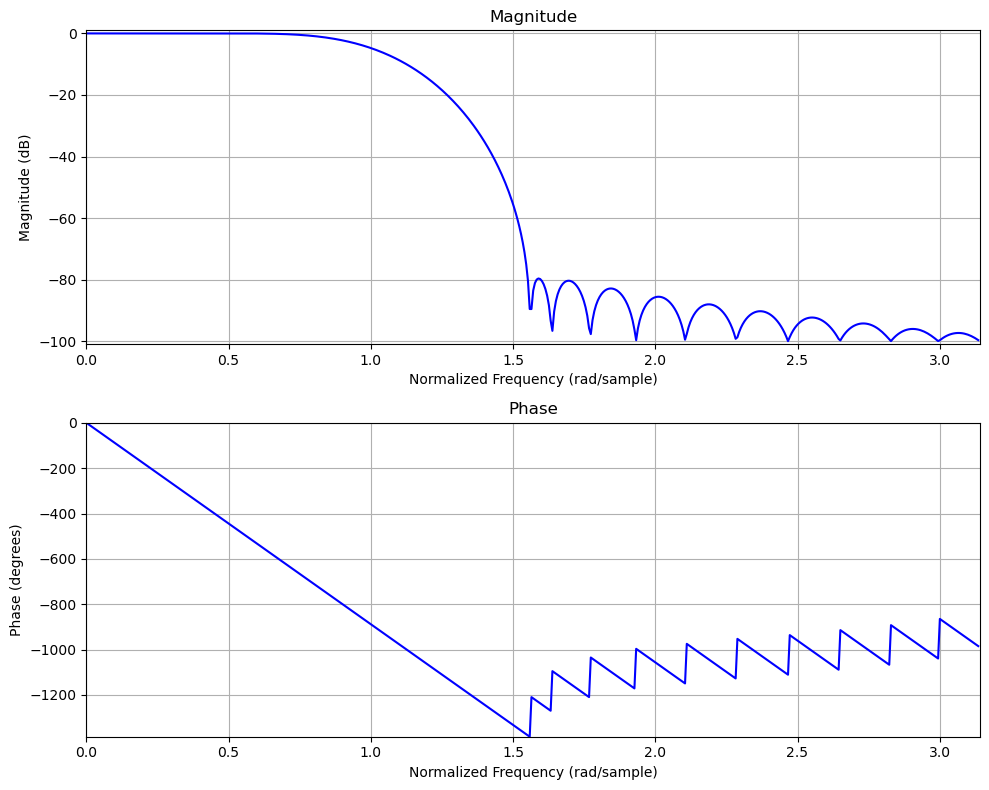

In [ ]:
freqz(hfilt)

Dapat dilihat bahwa stopband yang dimulai dari 0,5, masih memiliki redaman yang cukup, yaitu sekitar -80 dB, dan jika diambil 3 dB sebagai batas untuk pita lulus , itu mencapai frekuensi terstandarisasi 0,3.

Kembali ke contoh downsampling, di mana downsampling dari laju sampel 44,1 kHz menjadi 22,05 kHz, frekuensi terstandarisasi 0,5 sesuai dengan 11 kHz, dan batas atas pita lulus adalah 0,3.

## Cara Mendapatkan Modulasi High Pass atau Band Pass

### Pendekatan Pertama (Desain Filter Ideal)

Jika ingin mencari sebuah high pass, dapat dimulai dari mendesain filter high pass ideal menggunakan invers DTFT yang memberikan respon impuls ganda tak terhingga, dari −∞ hingga +∞. Jendela respon impuls ideal ini untuk mendapatkan filter FIR. Untuk high pass ideal, definisikan respons frekuensi yang diinginkan Hd(Ω) sebagai 1 pada frekuensi tinggi, di atas frekuensi cutoff Ωc, dan 0 pada frekuensi rendah.

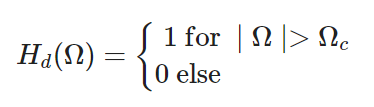

Jika ingin mencari respons impuls bernilai real, perlu membuat respons frekuensi sedemikian rupa sehingga nilai pada frekuensi negatif kompleks konjugat dari nilai-nilai pada frekuensi positif.

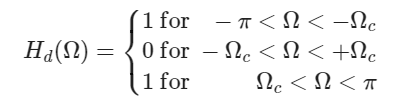

Sekarang invers DTFT bisa diterapkan.

### Pendekatan Kedua (Modulasi)

Menggeser pita lulus ke posisi yang diinginkan dalam domain frekuensi. Dengan cara ini dapat mengubah low pass menjadi band pass atau high pass, tergantung  di mana pita lulus tergeser. Bagaimana cara menggeser pita lulus dalam domain frekuensi?

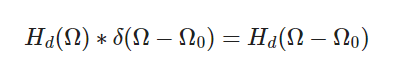

Jika ingin memiliki respons impuls bernilai real, perlu mempertahankan simetri antara frekuensi positif dan negatif, juga menggeser respons frekuensi dengan jumlah yang sama ke frekuensi negatif.

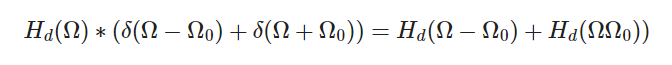

Bagaimana ini mengubah respons impuls? Untuk menjawabnya, digunakan invers DTFT. Konvolusi domain frekuensi menjadi perkalian dalam domain waktu. Hanya perlu invers DTFT dari (δ(Ω−Ω0)+δ(Ω+Ω0)), atau invers DTFT dari δ(Ω−Ω0).

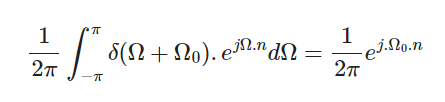

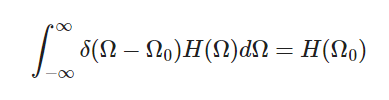

Sekarang didapatkan invers DTFT dari (δ(Ω−Ω0)+δ(Ω+Ω0))

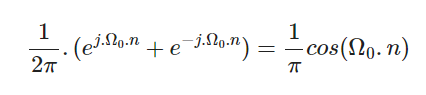

Ini adalah fungsi yang perlu dikalikan dengan filter low pass ideal, untuk mendapatkan filter ideal di mana pita lulus berpusat di sekitar Ω0.

### Contoh Python
Berikut penerapan pada sinyal audio. Contoh mengambil sinyal dari mikrofon yang dimodulasi dengan fungsi sinus 500 Hz.

In [ ]:
import pyaudio
import struct
import numpy
from ipywidgets import ToggleButton, Button
from ipywidgets import HBox
import threading

CHUNK = 5000
WIDTH = 2
CHANNELS = 1
RATE = 32000
RECORD_SECONDS = 8

def audio_app(toogle_run):
    while(True):
        if toggle_run.value==True:
            break

       data = (stream.read(CHUNK))
        shorts = (struct.unpack( 'h' * CHUNK, data))
        samples=(list(shorts))

        s=numpy.sin(2*numpy.pi/RATE*500*numpy.arange(0,CHUNK));
        samples=samples*s;
        samples=(numpy.clip(samples, -32000,32000)).astype(int)
        data=struct.pack('h' * len(samples), *samples);
        stream.write(data, CHUNK)

toggle_run = ToggleButton(description='Stop')
button_start = Button(description='Start')

def start_button(button_start):
    thread.start()
    button_start.disabled=True
button_start.on_click(start_button)


def on_click_toggle_run(change):
    if change['new']==False:
        stream.stop_stream()
        stream.close()
        p.terminate()
        plt.close()
        toggle_run.disabled=True
toggle_run.observe(on_click_toggle_run, 'value')

box_buttons = HBox([button_start,toggle_run])

thread = threading.Thread(target=audio_app, args=(toggle_run,))

p = pyaudio.PyAudio()

stream = p.open(format=p.get_format_from_width(WIDTH),
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                frames_per_buffer=CHUNK)

display(box_buttons)

Kesimpulannya adalah Kita dapat menggeser filter ideal ke dalam domain frekuensi dengan mengalikan respons impuls ideal dengan fungsi modulasi.

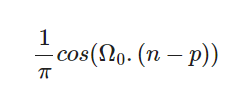

\( p \) adalah keterlambatan fase.

Digambarkan sebagai berikut. Pertama, spektrum asli low pass,

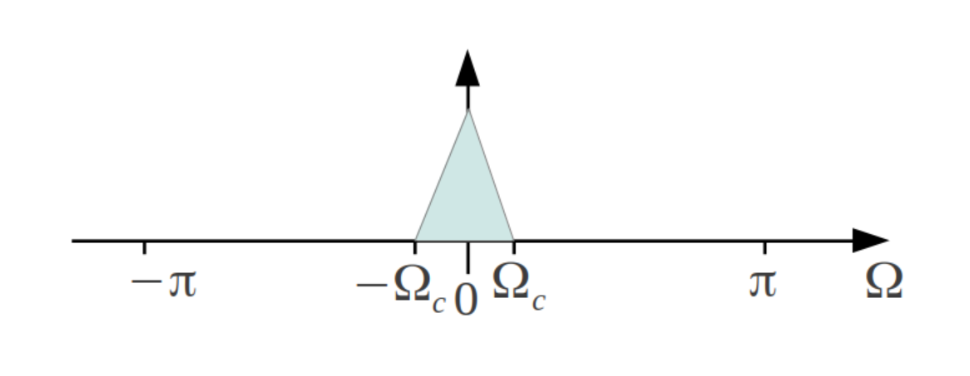

Selanjutnya, spektrum setelah modulasi dengan frekuensi 0.

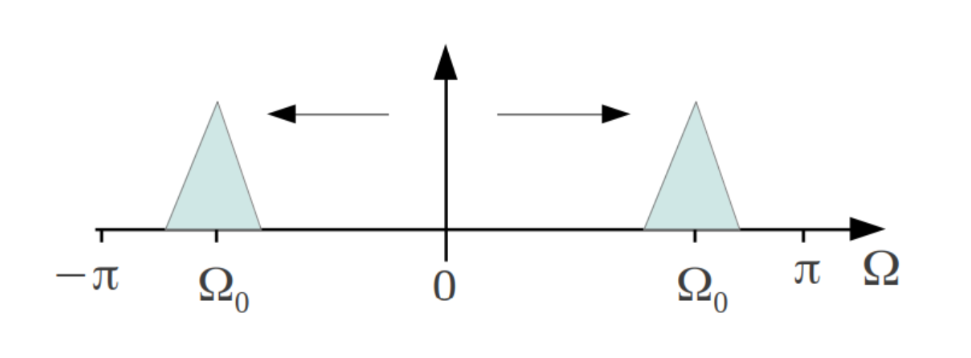

Untuk mendapatkan high pass, perlu menggeser pita lulus dari 0 hingga π, maka akan didapatkan Ω0 = π, dan p = 0. Fungsi modulasi kemudian adalah 1/π⋅cos(π⋅n) yang hanya berupa urutan +/-1

Misalnya untuk low pass:

In [ ]:
import numpy as np
n=np.arange(32);
#ideal impulse response:
h=np.sin(0.33*np.pi*(n-15.5))/(np.pi*(n-15.5));
#Kaiser window:
hk=np.kaiser(32,8)
#multiply ideal filter and Kaiser window:
hfilt=hk*h

High pass dapat dibuat dengan menggunakan modulasi:

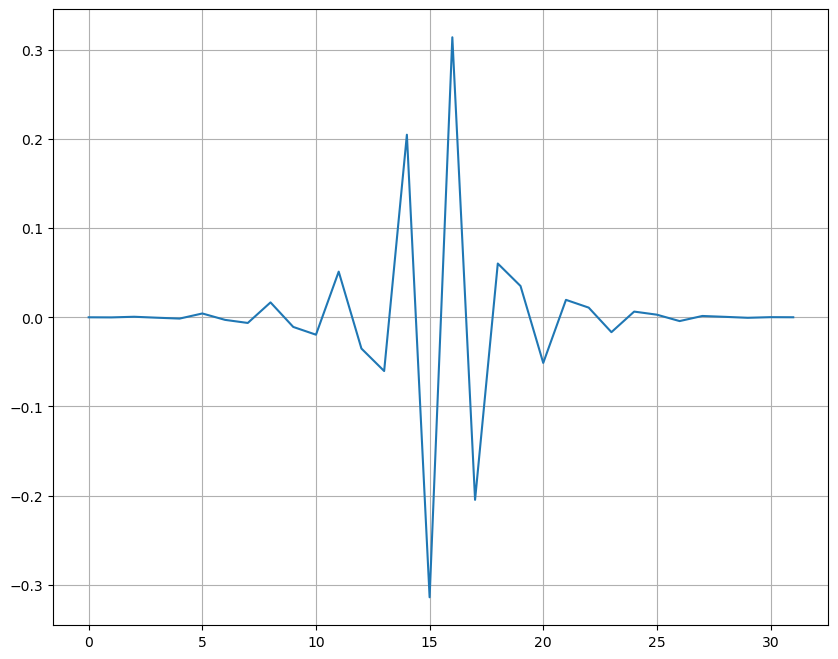

In [ ]:
import matplotlib.pyplot as plt
hp=hfilt*np.cos(np.pi *np.arange(32))

plt.figure(figsize=(10,8))
plt.plot(hp)
plt.grid()

Di sini dapat dilihat efek dari modulasi dengan urutan +/-1.

Respons frekuensi yang dihasilkan:

Respons frekuensi:

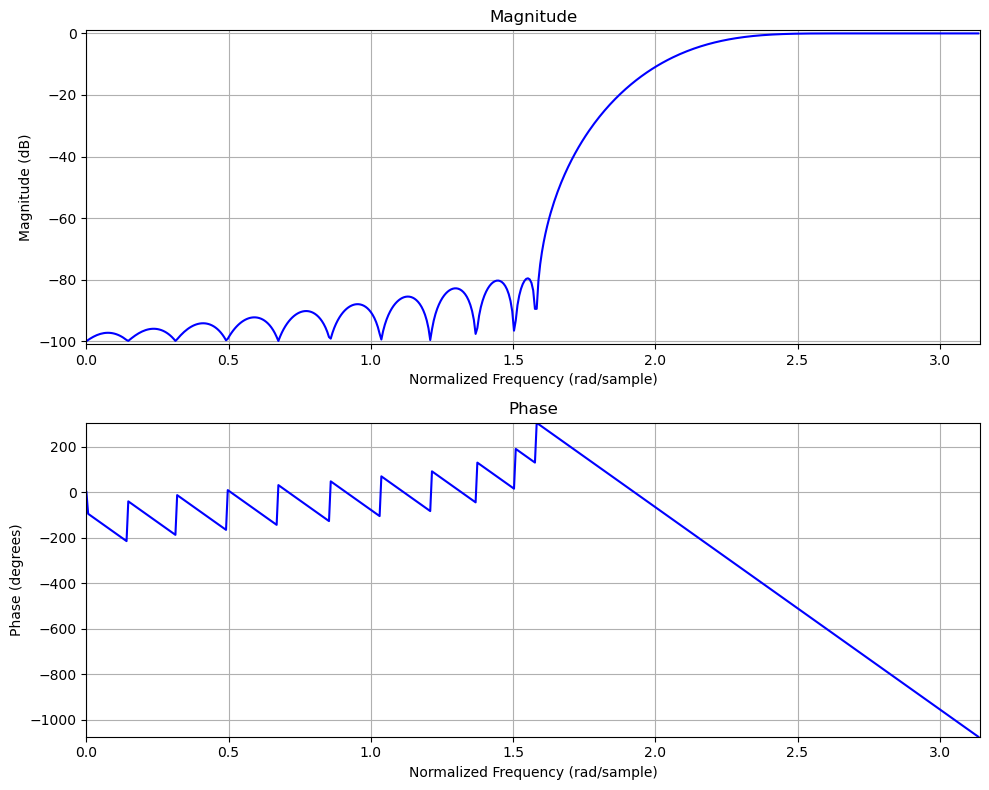

In [ ]:
freqz(hp)

Dapat dilihat bahwa high pass sudah didapatkan. Pada dasarnya terlihat terbalik di sekitar pusat. Ini tergeser, tetapi apa yang terlihat sebagai bagian high pass adalah bagian frekuensi negatif dari low pass.

Band pass bisa didapatkan dengan frekuensi pusat π/2 dengan:

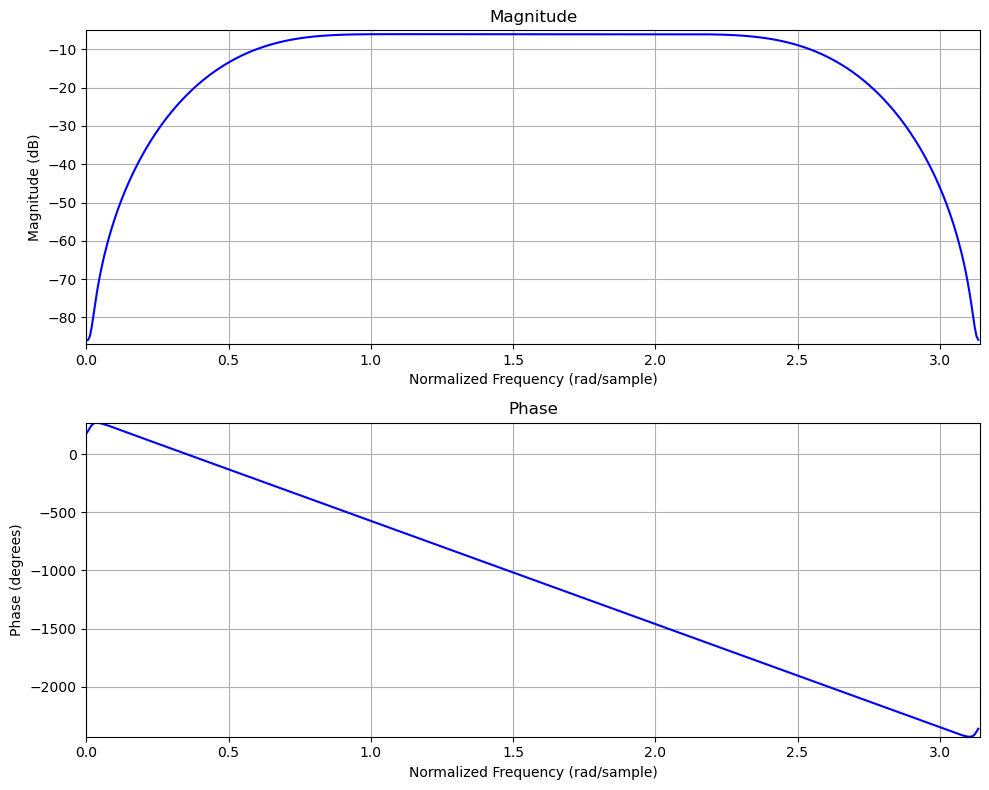

In [ ]:
hbp=hfilt*np.cos(np.pi/2 *np.arange(32))
freqz(hbp)

Dan band pass telah didapatkan.

Perhatikan bahwa pita lulus yang didapatkan dalam kasus band pass ini dua kali lebih lebar daripada dalam kasus low pass atau high pass, karena frekuensi negatif dari kasus low atau high pass muncul sebagai setengah lain dari pita lulus.